![j](http://localhost:8888/files/logo-coloured.svg )
* **Title:** 	PD3: Data Manipulation, modelling and analysis with Pandas and Jupyter - an introduction
* **Time:** 	05/09/2017, 11:50 - 13:10
* **Location:** 	Executive Room B
* **Type:** 	Professional Development



In [4]:
import random
for i in range(10):
    print(i, random.gauss(0, 1))




0 0.14126477923150274
1 -0.45039576281938937
2 0.24452235360792898
3 -1.3396261469382442
4 -0.5182968568507554
5 0.6827293379871744
6 0.7387916683658139
7 -0.5901540318094396
8 0.8333146454547908
9 -0.026698583029406284


In [5]:
from IPython.core.display import Image, SVG
firetriangleimg = "orgfiretriangle.svg"
firetriangleimg2 = "jppfiretriangle.svg"

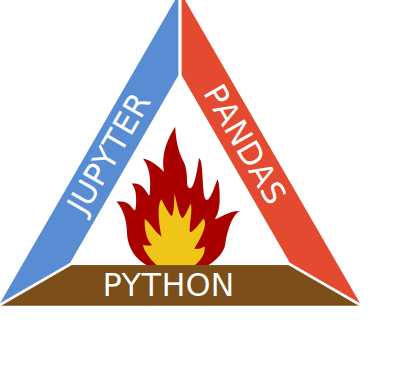

In [7]:
firetriangleimg, firetriangleimg2 = firetriangleimg2, firetriangleimg
SVG(firetriangleimg2)

(Commandline, scripts, interactive (show example of file) -- gives  rapid iteration for learning)

### Library links 
* Sensible Code Website http://sensiblecode.io/

* StatsModels http://www.statsmodels.org/stable/about.html  [history]

* SciPy https://scipy.org/  [size]

* DataBaker https://github.com/sensiblecodeio/databaker/blob/master/databaker/tutorial/Introduction.ipynb  [ours]


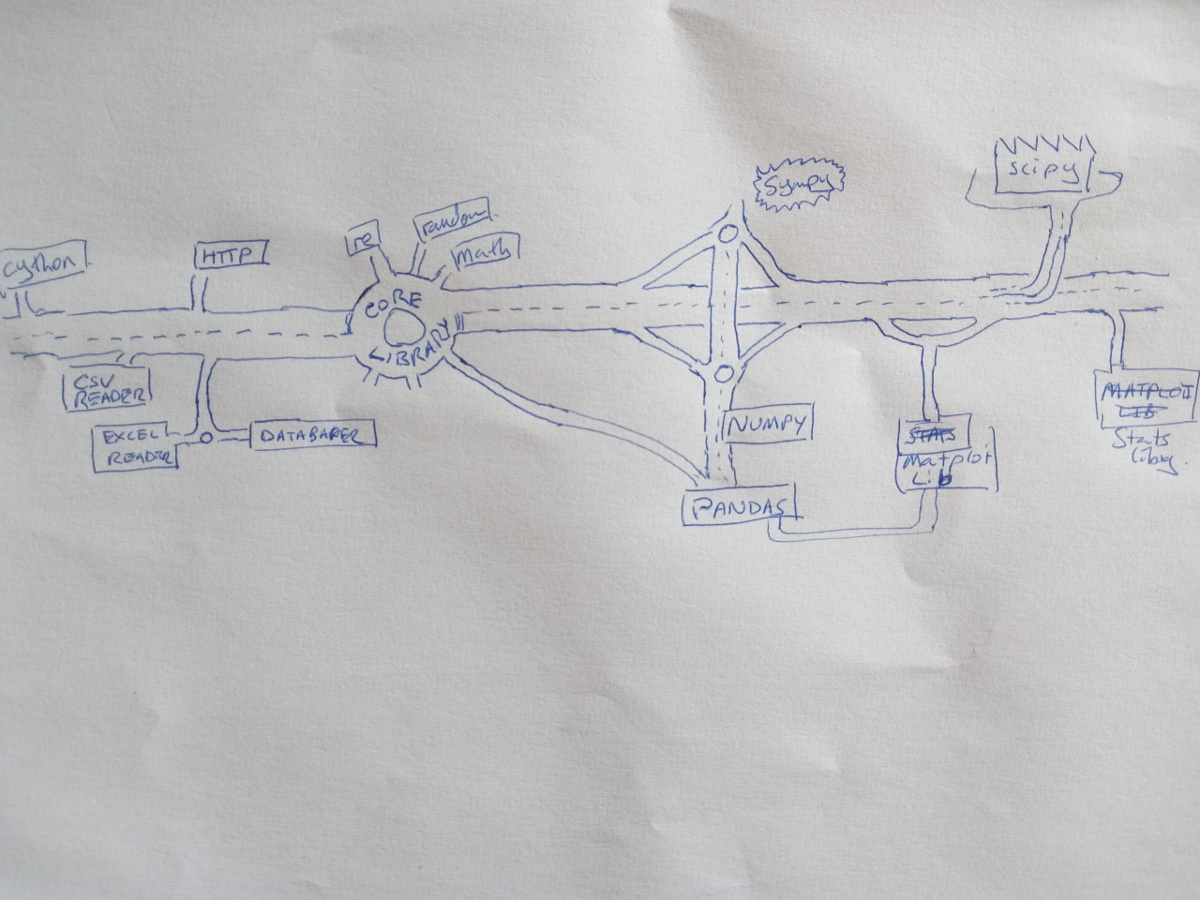

In [13]:
Image("roadmap.jpg")

* ONS data   https://www.ons.gov.uk/businessindustryandtrade/constructionindustry/datasets/outputintheconstructionindustry/current  [example]

* raw spreadsheet is constructiondata.xls

Databaker Demo
(Look at http://localhost:8888/notebooks/ConstructionOutputFullWorking.ipynb  )

In [101]:
from databaker.framework import *
tabs = loadxlstabs("constructiondata.xls")
tab = tabs[6]
print(tab.name)


Loading constructiondata.xls which has size 1023488 bytes
Table names: ['Correction Notice', 'Cover Sheet', 'Contents', 'Table 1a', 'Table 1b', 'Table 2a', 'Table 2b', 'Table 3a', 'Table 3b', 'Table 3c', 'Table 3d', 'Table 4', 'Table 4a', 'Table 5', 'Table 6', 'Table 7a', 'Table 7b', 'Table 9a', 'Table 10', 'Table 11', 'Table 12', 'Table 13', 'Table 14']
Table 2b


In [102]:
savepreviewhtml(tab, "preview.html")

tablepart 'Table 2b' written #injblock1007


/home/julian/repositories/royalstatsoctalk/preview.html

In [103]:
jan = tab.filter("Jan")
jan = jan.by_index(1)
pubh = jan.shift(RIGHT).expand(DOWN)
prih = pubh.shift(RIGHT)
savepreviewhtml([pubh, prih], "preview.html")

tablepart 'Table 2b' written #injblock1008


/home/julian/repositories/royalstatsoctalk/preview.html

In [19]:
vpubh = [ k.value  for k in pubh ]
vprih = [ k.value  for k in prih ]



[851.0, 1040.0, 1255.0, 1255.0, 1297.0, 1394.0, 1344.0, 1367.0, 1429.0, 1492.0, 1447.0, 1205.0, 1113.0, 1222.0, 1445.0, 1330.0, 1416.0, 1634.0, 1479.0, 1439.0, 1439.0, 1464.0, 1464.0, 1323.0, 1198.0, 1284.0, 1507.0, 1332.0, 1411.0, 1454.0, 1346.0, 1281.0, 1358.0, 1503.0, 1449.0, 1240.0, 1111.0, 1250.0, 1352.0, 1469.0, 1498.0, 1654.0, 1565.0, 1522.0, 1551.0, 1755.0, 1628.0, 1548.0, 1520.0, 1487.0, 1718.0, 1788.0, 1834.0, 1998.0, 2005.0, 1860.0, 1988.0, 2116.0, 1993.0, 1833.0, 1684.0, 1723.0, 1991.0, 2083.0, 2068.0, 2223.0, 2066.0, 1897.0, 2016.0, 2189.0, 2062.0, 2067.0, 1776.0, 2036.0, 2295.0, 2298.0, 2268.0, 2469.0, 2279.0, 2250.0, 2323.0, 2404.0, 2399.0, 2236.0, 1954.0, 2033.0, 2471.0, 2224.0, 2308.0]


In [104]:
from matplotlib import pyplot as plt
%matplotlib inline

In [107]:
print(vpubh)


[260.0, 366.0, 392.0, 377.0, 396.0, 410.0, 412.0, 433.0, 427.0, 437.0, 439.0, 372.0, 363.0, 394.0, 457.0, 407.0, 426.0, 445.0, 376.0, 387.0, 426.0, 394.0, 403.0, 345.0, 334.0, 322.0, 355.0, 342.0, 327.0, 343.0, 344.0, 328.0, 339.0, 339.0, 341.0, 321.0, 259.0, 301.0, 345.0, 331.0, 350.0, 402.0, 357.0, 363.0, 376.0, 417.0, 419.0, 383.0, 358.0, 408.0, 472.0, 424.0, 485.0, 539.0, 481.0, 500.0, 505.0, 496.0, 477.0, 458.0, 377.0, 419.0, 455.0, 442.0, 405.0, 444.0, 363.0, 331.0, 356.0, 351.0, 341.0, 342.0, 305.0, 314.0, 385.0, 326.0, 353.0, 419.0, 355.0, 353.0, 376.0, 367.0, 370.0, 374.0, 305.0, 344.0, 431.0, 365.0, 414.0]


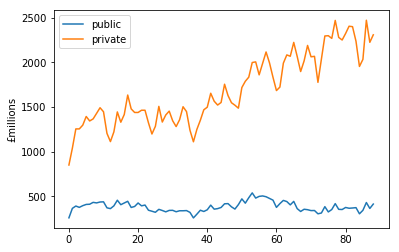

In [105]:
plt.plot(vpubh, label="public")
plt.plot(vprih, label="private")
plt.ylabel("£millions")
plt.legend()


In [118]:
import scipy.stats
#help(scipy.stats.stats.tmean)

m = scipy.stats.stats.tmean(vprih)
scipy.stats.stats.tstd(vprih)
#help(scipy.stats.stats.tstd)


393.90148220247596

In [119]:
import math
math.sqrt(sum([(k-m)**2  for k in vprih])/(len(vprih)-1))



393.90148220247596

In [45]:
import math
s = 0
for k in vprih:
    s = s + (k-m)**2
math.sqrt(s/(len(vprih)-1))


393.90148220247596

In [170]:
import pandas
pandas.DataFrame({"private":vprih, "public":vpubh})

,private,public
0,851.0,260.0
1,1040.0,366.0
2,1255.0,392.0
3,1255.0,377.0
4,1297.0,396.0
5,1394.0,410.0
6,1344.0,412.0
7,1367.0,433.0
8,1429.0,427.0
9,1492.0,437.0


In [145]:

import pandas as pd
#pd.DataFrame(vprih).hist()

scipy.stats.normaltest(vprih)
#help(scipy.stats.normaltest)

NormaltestResult(statistic=14.279820971307094, pvalue=0.00079282306232846781)

In [173]:
import random

vs = [ ]
for j in range(1000):
    v = [ random.gauss(300, 20)  for i in range(1000) ]
    p = scipy.stats.normaltest(v).pvalue
    vs.append((p, v))


In [174]:
vs.sort()
vs[0]

(0.00033706533849953683,
 [259.7443217854653,
  256.23637770666903,
  291.4625494879787,
  292.707624658499,
  247.96701416212534,
  289.1475581353088,
  304.36074088506314,
  285.49001388916906,
  293.9209820833648,
  313.26236469487054,
  318.19346780914793,
  290.9916816277026,
  299.93866404152703,
  287.8879547712627,
  305.7071941591308,
  334.7759698972394,
  301.6044711411842,
  294.4118238865163,
  324.8063304249965,
  312.2802427059798,
  329.4885029029579,
  313.0268690344306,
  292.0539884076588,
  298.33508990786567,
  307.8529919427666,
  303.8525693214047,
  298.4917642169316,
  277.850584344391,
  309.40402234252707,
  277.8779791348781,
  281.10392143976094,
  302.05290419489364,
  301.5423758170006,
  284.6746238047268,
  333.0521273372577,
  321.1295499347389,
  315.6153512657982,
  306.2594270497265,
  269.10976505237267,
  277.6153858698496,
  283.69775343287046,
  284.4168468264859,
  292.4727225235845,
  290.12269222949476,
  320.72146345453626,
  301.17545068844

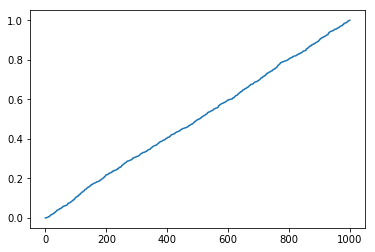

In [157]:
vs.sort()
plt.plot(vs)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ef887e2b0>]], dtype=object)

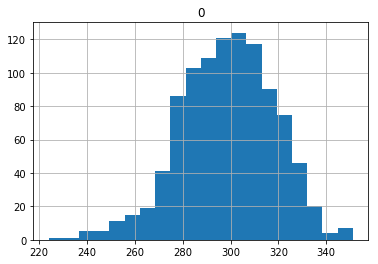

In [179]:
v = vs[0][1]
pd.DataFrame(v).hist(bins=20)

In [178]:
scipy.stats.stats.tstd(v)

19.550352721792599

In [72]:
import random

nps = [ ]
for j in range(1000):
    v = [ random.gauss(300, 10)  for i in range(100) ]
    p = scipy.stats.normaltest(v).pvalue
    nps.append(p)
nps;

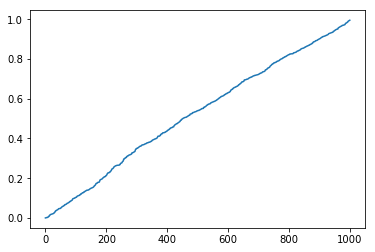

In [74]:
#pd.DataFrame(nps).hist()
nps.sort()
plt.plot(nps)

In [ ]:
# scipy.stats.stats.tmean tstd
# scipy.stats.histogram
# pd.Dataframe(v).hist()
# look at scipy.stats.normaltest
# statsmodels.tsa.seasonal.seasonal_decomposition

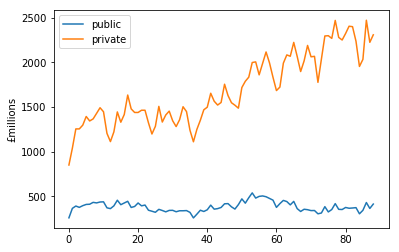

In [75]:
plt.plot(vpubh, label="public")
plt.plot(vprih, label="private")
plt.ylabel("£millions")
plt.legend()


In [160]:
statsmodels.tsa.seasonal.seasonal_decompose(vprih, freq=12)


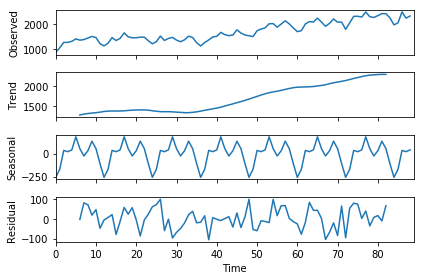

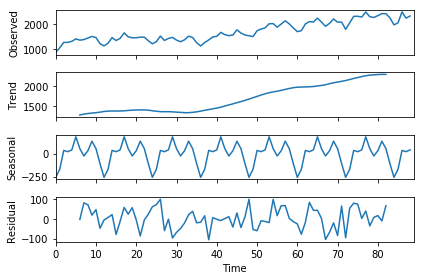

In [167]:
h.plot()

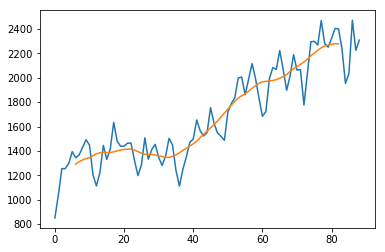

In [88]:
plt.plot(vprih)
plt.plot(h.trend)


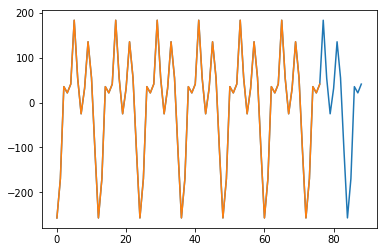

In [166]:
plt.plot(h.seasonal)
plt.plot(h.seasonal[12:])



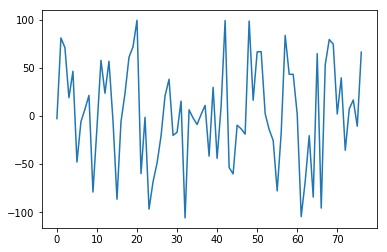

In [99]:
plt.plot(h.resid[6:-6])



In [100]:
scipy.stats.normaltest(h.resid[6:-6])

NormaltestResult(statistic=2.0042709636639833, pvalue=0.36709467952880054)